Grande lignes sur ce deuxième projet :

Challenge Classification. Modèle classification.


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
file_path = '/content/drive/MyDrive/Colab Notebooks/farms_train.csv'
data = pd.read_csv(file_path, sep=';', decimal=',')

In [30]:
data

,DIFF,R2,R7,R8,R17,R22,R32
0,0,0.705,0.290,0.13340,0.0481,0.5258,0.29410
1,1,0.801,0.213,0.12820,0.0186,2.1411,0.30050
2,1,0.591,0.429,0.29990,0.0800,0.5957,0.41260
3,0,0.373,0.346,1.37040,0.0812,0.3430,0.22650
4,0,0.000,1.417,0.24930,0.0501,0.8728,0.10860
...,...,...,...,...,...,...,...
298,0,0.272,0.472,0.46600,0.0880,1.0243,0.05513
299,1,0.682,0.745,0.09558,0.0641,0.6582,0.30310
300,0,0.442,0.671,0.14000,0.0545,0.5478,0.17400
301,1,0.190,0.439,0.29940,0.0276,0.9328,0.31370


Statistiques descriptives :
             DIFF          R2          R7          R8         R17         R22  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.524752    0.527877    0.672664    0.380717    0.063825    0.710766   
std      0.500213    0.297593    0.506008    0.340379    0.026986    0.887343   
min      0.000000    0.000000    0.051300    0.024290    0.018600    0.055390   
25%      0.000000    0.316500    0.312000    0.141100    0.044000    0.287800   
50%      1.000000    0.603000    0.574000    0.273600    0.060000    0.493500   
75%      1.000000    0.761000    0.909500    0.521750    0.081300    0.811600   
max      1.000000    0.950000    2.557000    1.849400    0.194000   10.840000   

              R32  
count  303.000000  
mean     0.248527  
std      0.130599  
min     -0.162000  
25%      0.171350  
50%      0.266900  
75%      0.338250  
max      0.660800  


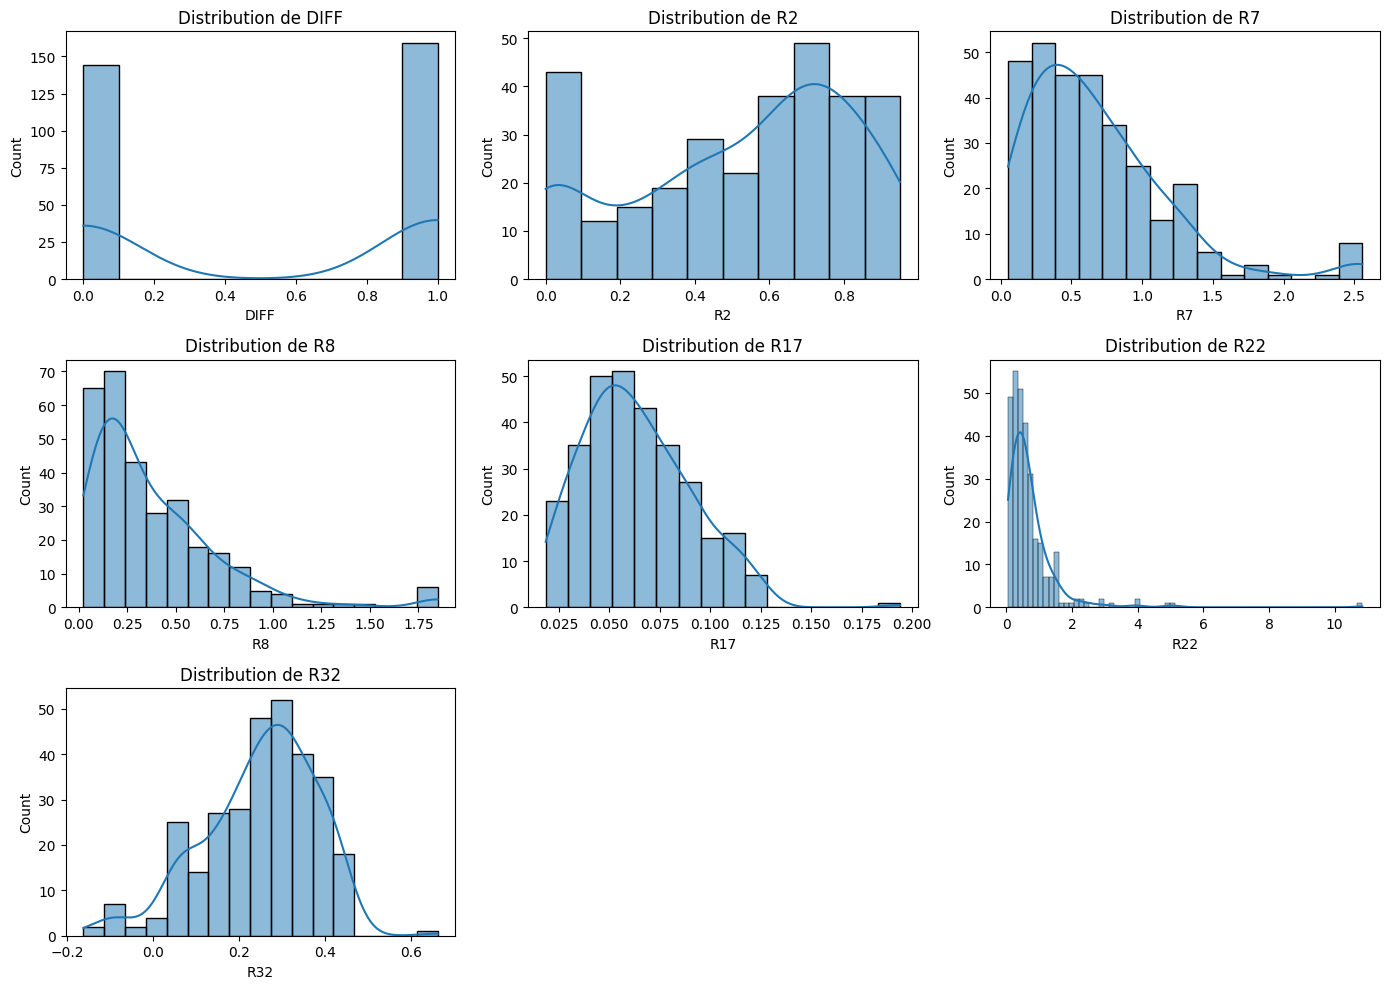

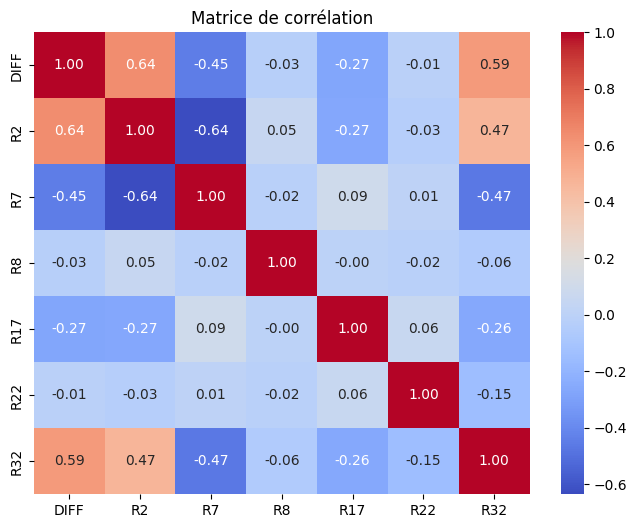

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
data = pd.read_csv(file_path, sep=';', decimal=',')

# Imputation des valeurs manquantes avec la moyenne de chaque colonne
data.fillna(data.mean(), inplace=True)

# Affichage des statistiques descriptives
print("Statistiques descriptives :")
print(data.describe())

# Visualisation des distributions
plt.figure(figsize=(14, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution de {column}")
plt.tight_layout()
plt.show()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

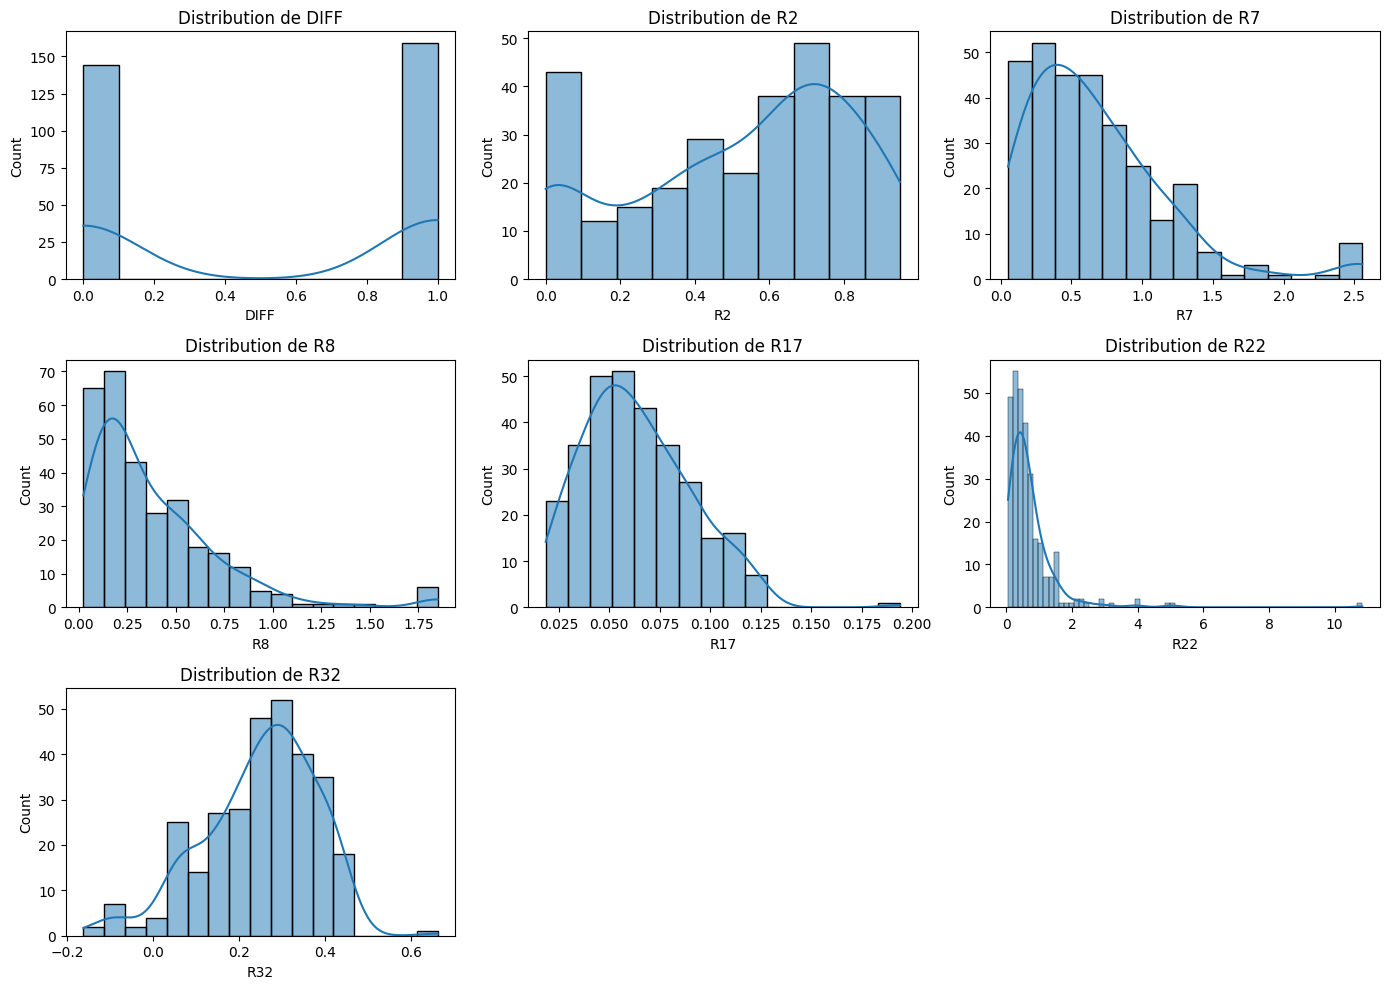

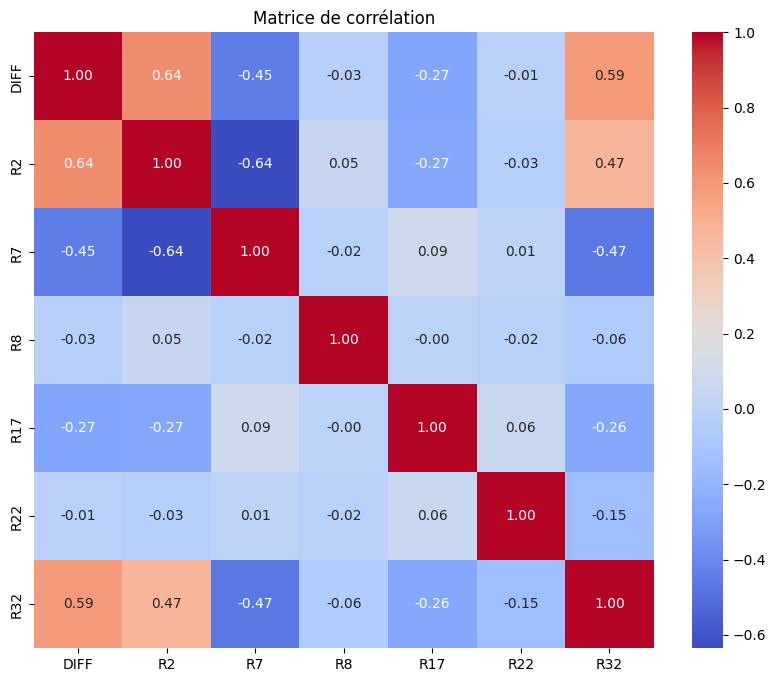

In [32]:

# Visualisation des distributions de chaque variable
plt.figure(figsize=(14, 10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution de {column}")
plt.tight_layout()
plt.show()

# Visualiser les corrélations en utilisant une matrice de chaleur
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

On va supprimer les variables corrélé, une des deux variables corrélé.

On va garder seulement les variables qui sont corrélé a la variables cibles car il sont dites explicatives.

In [33]:
# Calcul de la corrélation entre R2 et R7
correlation = data['R2'].corr(data['R7'])
print(f"Corrélation entre R2 et R7 : {correlation}")

Corrélation entre R2 et R7 : -0.6357081953348356


In [34]:
data

,DIFF,R2,R7,R8,R17,R22,R32
0,0,0.705,0.290,0.13340,0.0481,0.5258,0.29410
1,1,0.801,0.213,0.12820,0.0186,2.1411,0.30050
2,1,0.591,0.429,0.29990,0.0800,0.5957,0.41260
3,0,0.373,0.346,1.37040,0.0812,0.3430,0.22650
4,0,0.000,1.417,0.24930,0.0501,0.8728,0.10860
...,...,...,...,...,...,...,...
298,0,0.272,0.472,0.46600,0.0880,1.0243,0.05513
299,1,0.682,0.745,0.09558,0.0641,0.6582,0.30310
300,0,0.442,0.671,0.14000,0.0545,0.5478,0.17400
301,1,0.190,0.439,0.29940,0.0276,0.9328,0.31370


Précision du modèle : 0.7704918032786885

Matrice de confusion :
 [[20  9]
 [ 5 27]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.80      0.69      0.74        29
           1       0.75      0.84      0.79        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Score AUC (ROC) : 0.8696120689655172


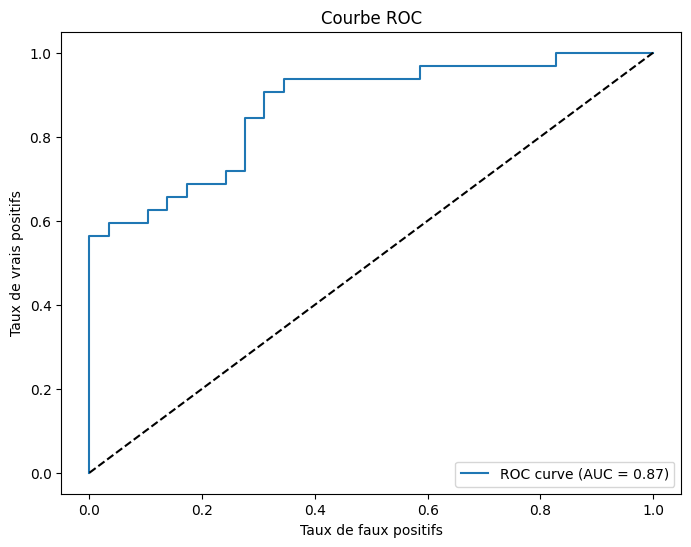

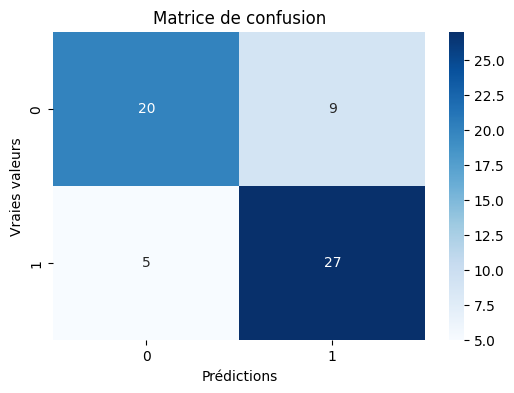

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV
file_path = '/content/drive/MyDrive/Colab Notebooks/farms_train.csv'
data = pd.read_csv(file_path, sep=';', decimal=',')

# Imputer les valeurs manquantes avec la moyenne
data.fillna(data.mean(), inplace=True)

# Sélection des variables explicatives et de la variable cible
X = data[['R32', 'R17', 'R2', 'R7']]  # Variables explicatives
y = data['DIFF']  # Variable cible

# Diviser les données en ensemble d'entraînement et de test (80 % - 20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire les valeurs de la cible sur l'ensemble de test
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilités pour l'AUC et la courbe ROC

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Précision du modèle :", accuracy)
print("\nMatrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", classification_rep)
print("\nScore AUC (ROC) :", roc_auc)

# Tracer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale de référence
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

# Afficher la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()


Une précision de 77 % indique que le modèle classe correctement les clients fiables et non fiables dans 77 % des cas.

Cette précision est acceptable, mais il est possible qu'elle puisse être améliorée avec des ajustements ou en testant d'autres modèles.

Vrais négatifs (20) : 20 clients sont correctement classés comme non fiables (classe 0).
Faux positifs (9) : 9 clients non fiables sont incorrectement classés comme fiables.
Faux négatifs (5) : 5 clients fiables sont incorrectement classés comme non fiables.
Vrais positifs (27) : 27 clients fiables sont correctement classés comme fiables (classe 1).

Précision de la classe 0 (non fiable) : 0.80
Précision de la classe 1 (fiable) : 0.75
La précision et le rappel sont équilibrés, ce qui signifie que le modèle est assez bon pour capturer les deux classes sans déséquilibre majeur.
F1-score global : La moyenne pondérée (0.77) et la moyenne macro (0.77) suggèrent une performance raisonnable pour les deux classes.

On va tester en prenant toutes les variables comme variables exoplicatives pour voir l'effet.

Précision du modèle : 0.7377049180327869

Matrice de confusion :
 [[20  9]
 [ 7 25]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.74      0.78      0.76        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61


Score AUC (ROC) : 0.8383620689655172


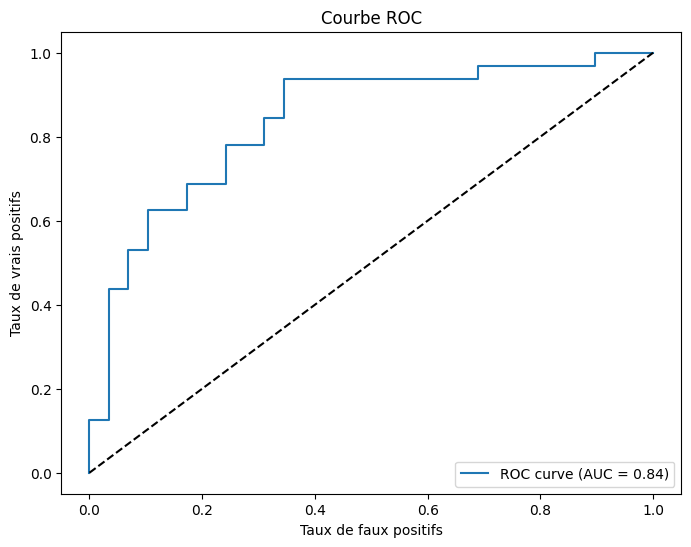

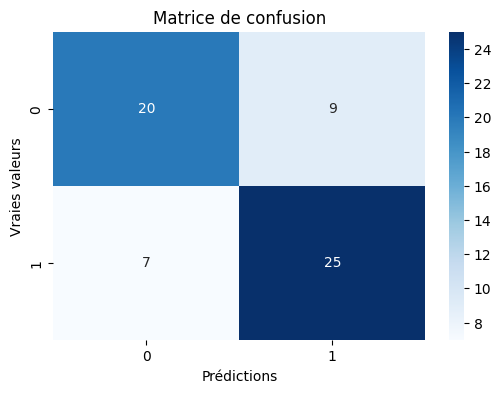

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV
file_path = '/content/drive/MyDrive/Colab Notebooks/farms_train.csv'
data_nouveau = pd.read_csv(file_path, sep=';', decimal=',')

# Imputer les valeurs manquantes avec la moyenne
data_nouveau.fillna(data_nouveau.mean(), inplace=True)

# Sélection des variables explicatives et de la variable cible
X = data_nouveau[['R32', 'R17', 'R2', 'R7', 'R8', 'R22']]  # Toutes les variables explicatives
y = data_nouveau['DIFF']  # Variable cible

# Diviser les données en ensemble d'entraînement et de test (80 % - 20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de gradient boosting
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédire les valeurs de la cible sur l'ensemble de test
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilités pour l'AUC et la courbe ROC

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Précision du modèle :", accuracy)
print("\nMatrice de confusion :\n", conf_matrix)
print("\nRapport de classification :\n", classification_rep)
print("\nScore AUC (ROC) :", roc_auc)

# Tracer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale de référence
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

# Afficher la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()

Il semble préférable de conserver le premier modèle de régression logistique avec les variables explicatives ciblées (R32, R17, R2, et R7), car il a montré des performances légèrement meilleures